In [107]:
##################################################
#  8820 Introduction to Bayesian Statistics
#   Project 1: Predicts Flu
#   Shirong Zhao
#################################################
library(MASS)
library(mvtnorm)
library(coda)
library(Matrix) 
library(mnormt)
library(gdata) # use inside command write.fwf
#################################################
#######################  BEGIN Import Cleaned Data ##########################\

formatInfo6<-read.csv("./formatInfo6.csv")
df6 <- read.fwf(file="./outcome6.txt", widths=formatInfo6$width + 1, skip=1, strip.white=TRUE, na.strings="n.a.") 
# V14 is the number of flu for state i and time t

######################## End Import Cleaned Data #########################

In [108]:
Beta=df6[,1:12]
Tau2=df6[,13]
Theta=df6[,14]
Rho=df6[,15]

 [1] "Estimate Mean of beta:  -10.684221097"    
 [2] "Estimate Mean of beta:  5.2724948455"     
 [3] "Estimate Mean of beta:  -0.03549943726"   
 [4] "Estimate Mean of beta:  -0.03131745549"   
 [5] "Estimate Mean of beta:  0.002009964140839"
 [6] "Estimate Mean of beta:  18.34127494"      
 [7] "Estimate Mean of beta:  23.837282185"     
 [8] "Estimate Mean of beta:  25.995580965"     
 [9] "Estimate Mean of beta:  29.412938725"     
[10] "Estimate Mean of beta:  0.50340596025"    
[11] "Estimate Mean of beta:  0.120505591915"   
[12] "Estimate Mean of beta:  0.3432550136"     


,lower,upper
V1,-1.189809e+01,-9.645808000
V2,5.027653e+00,5.466357000
V3,-3.839167e-02,-0.033029160
V4,-3.166563e-02,-0.030899410
V5,1.163664e-04,0.003960714
V6,1.735242e+01,19.637030000
V7,2.286591e+01,25.187070000
V8,2.475293e+01,27.481150000
V9,2.814233e+01,30.957280000
V10,4.849123e-01,0.514415600


 [1] "Effective Sample Size:  8.18090420226618"
 [2] "Effective Sample Size:  9.05406905510675"
 [3] "Effective Sample Size:  3.89255584079957"
 [4] "Effective Sample Size:  354.733460136454"
 [5] "Effective Sample Size:  4.38205581873774"
 [6] "Effective Sample Size:  14.130010113093" 
 [7] "Effective Sample Size:  14.1830557359757"
 [8] "Effective Sample Size:  19.7432466418534"
 [9] "Effective Sample Size:  16.1332220709527"
[10] "Effective Sample Size:  23.3979198591746"
[11] "Effective Sample Size:  4.7866037149808" 
[12] "Effective Sample Size:  4.63409930628731"


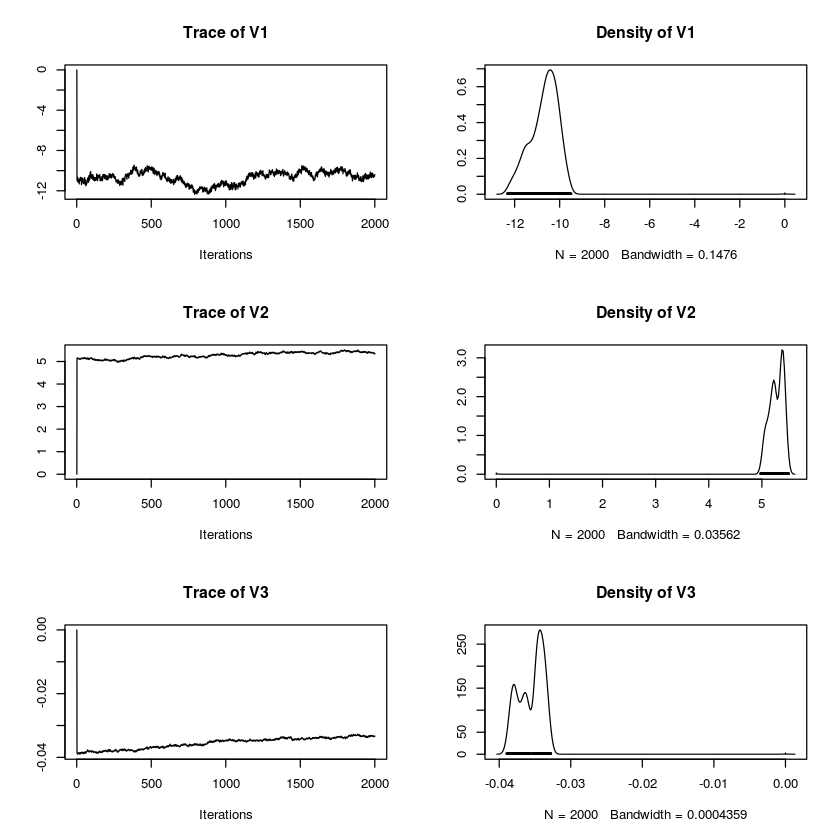

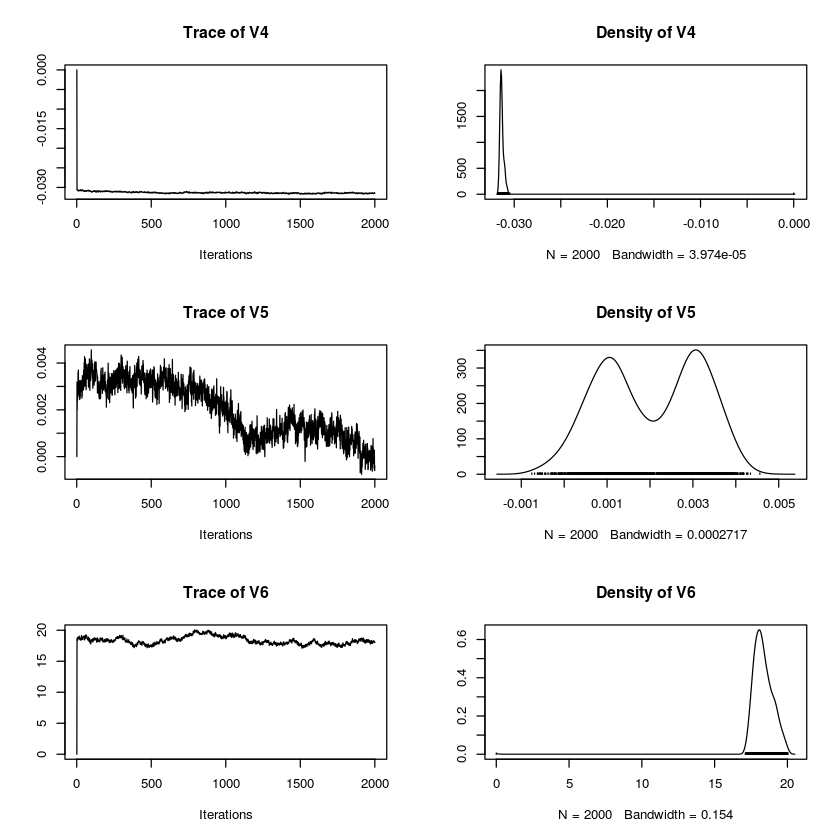

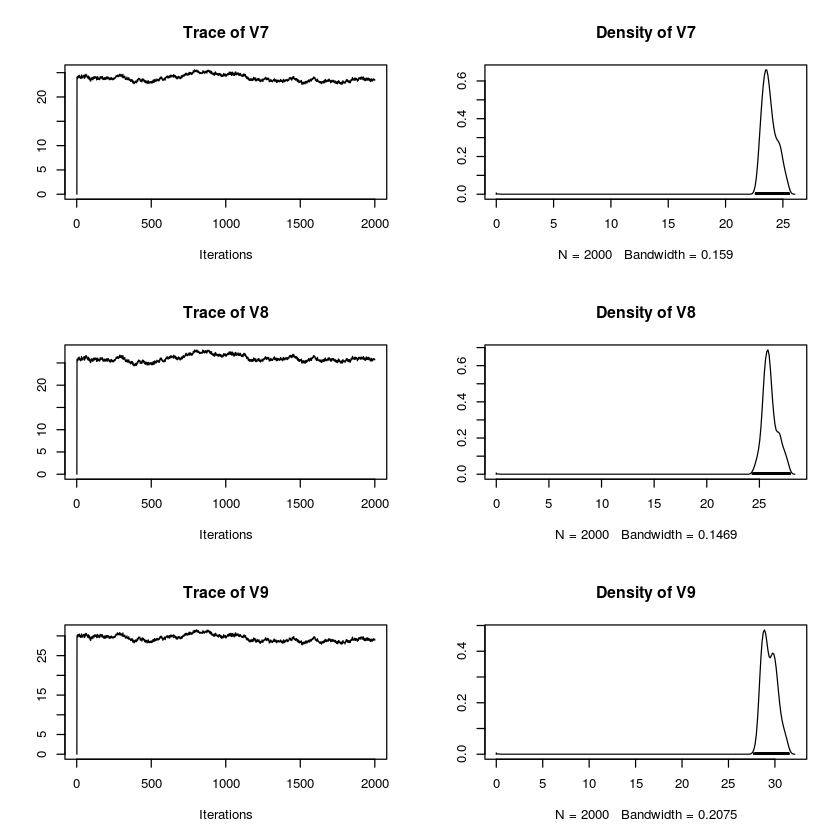

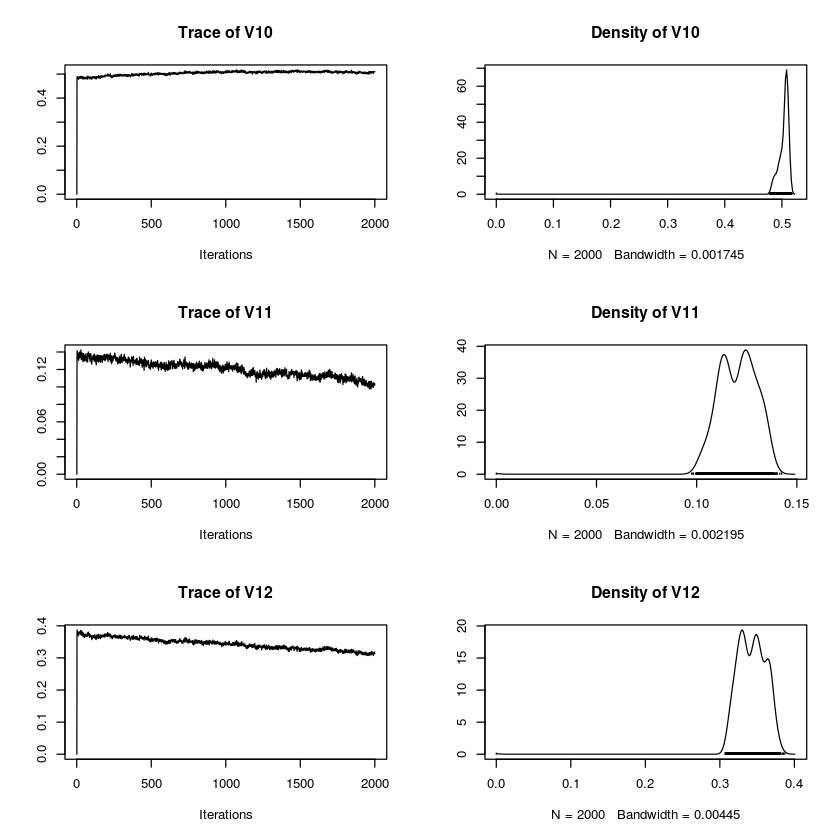

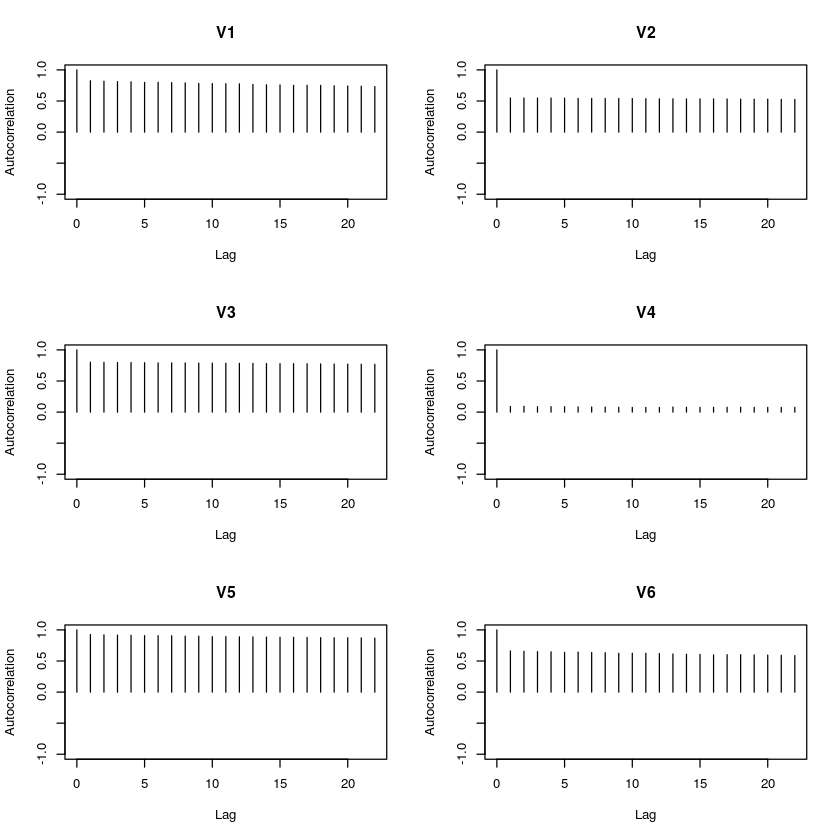

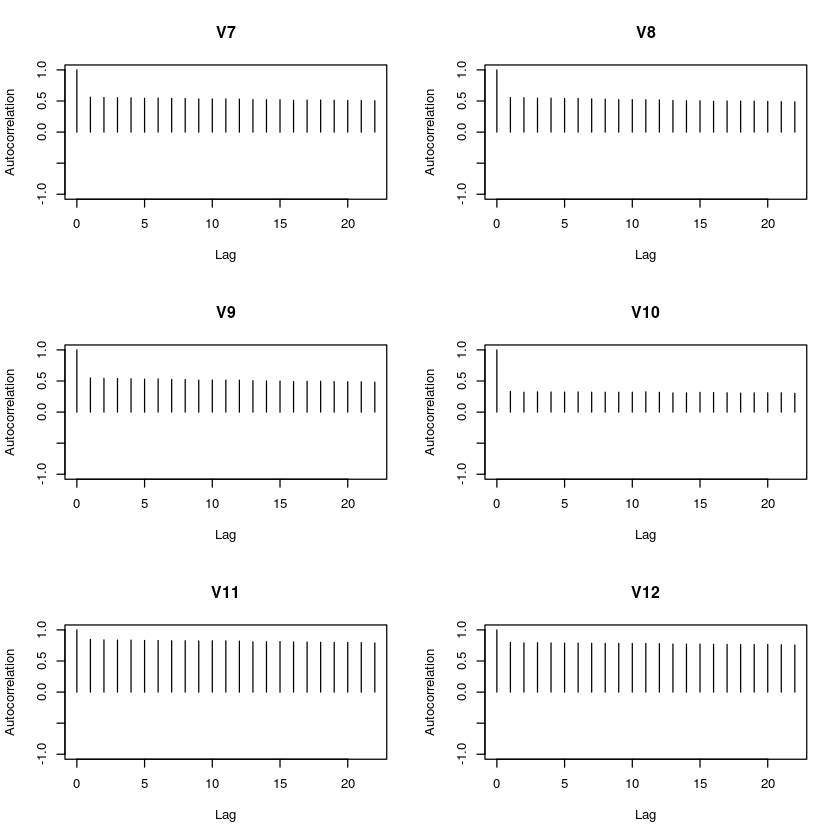

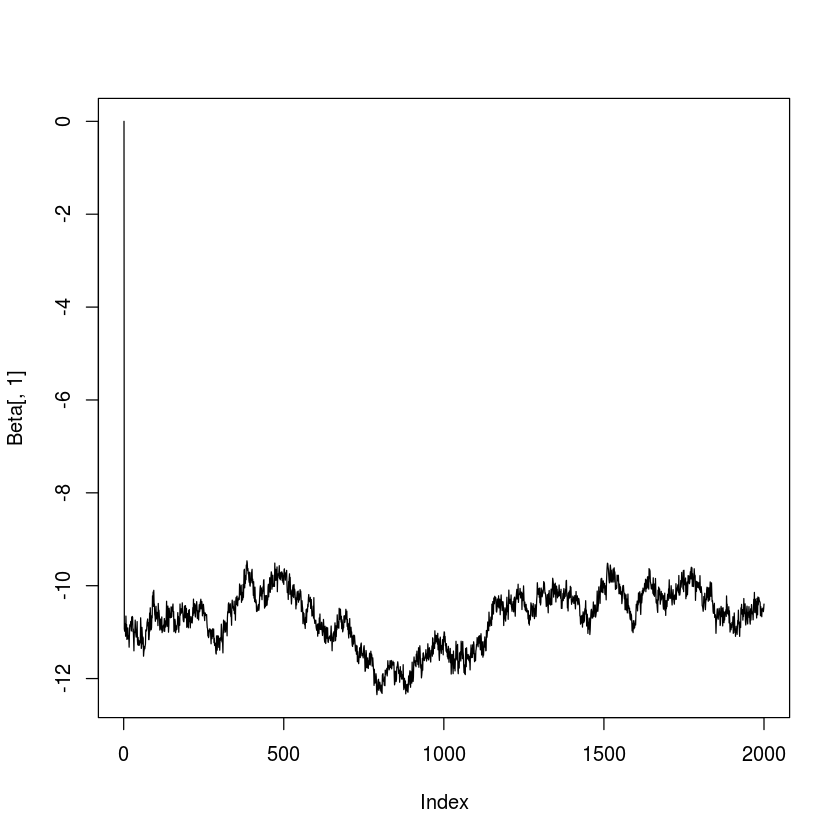

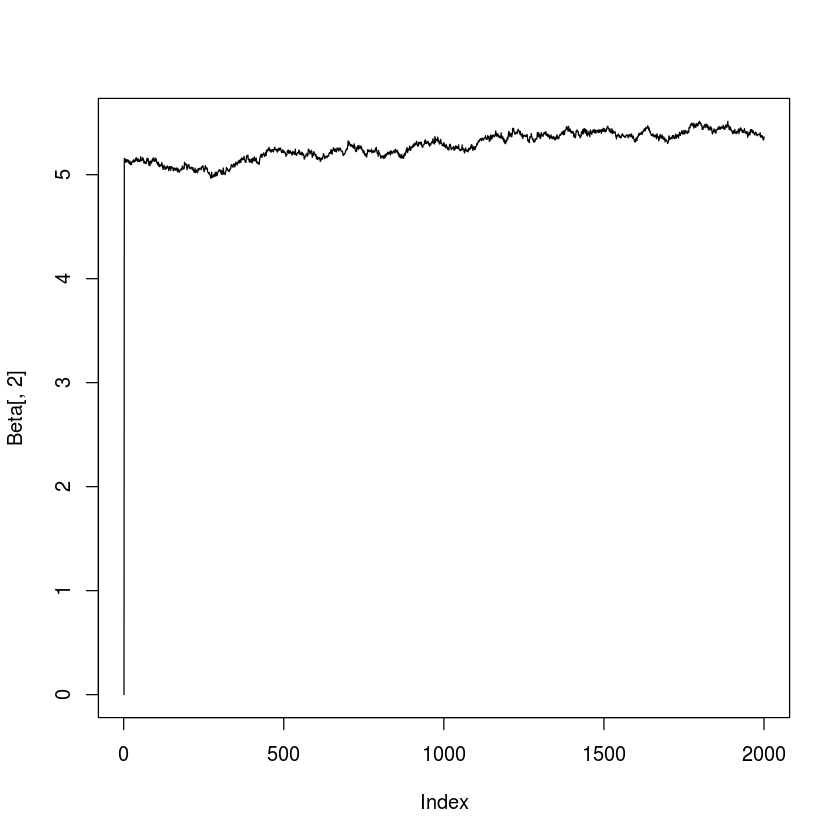

In [109]:
Beta.mcmc = as.mcmc(Beta)
print(paste0("Estimate Mean of beta:  ", apply(Beta.mcmc, 2, mean)))
HPDinterval(Beta.mcmc)
print(paste0("Effective Sample Size:  ", effectiveSize(Beta.mcmc)))
plot(Beta.mcmc)
autocorr.plot(Beta.mcmc)
plot(Beta[, 1], typ = 'l')
plot(Beta[, 2], typ = 'l')


[1] "Estimate Mean of tau2:  0.49859439815"


,lower,upper
var1,0.4123481,0.5846712


[1] "Effective Sample Size:  2.43474630447396"


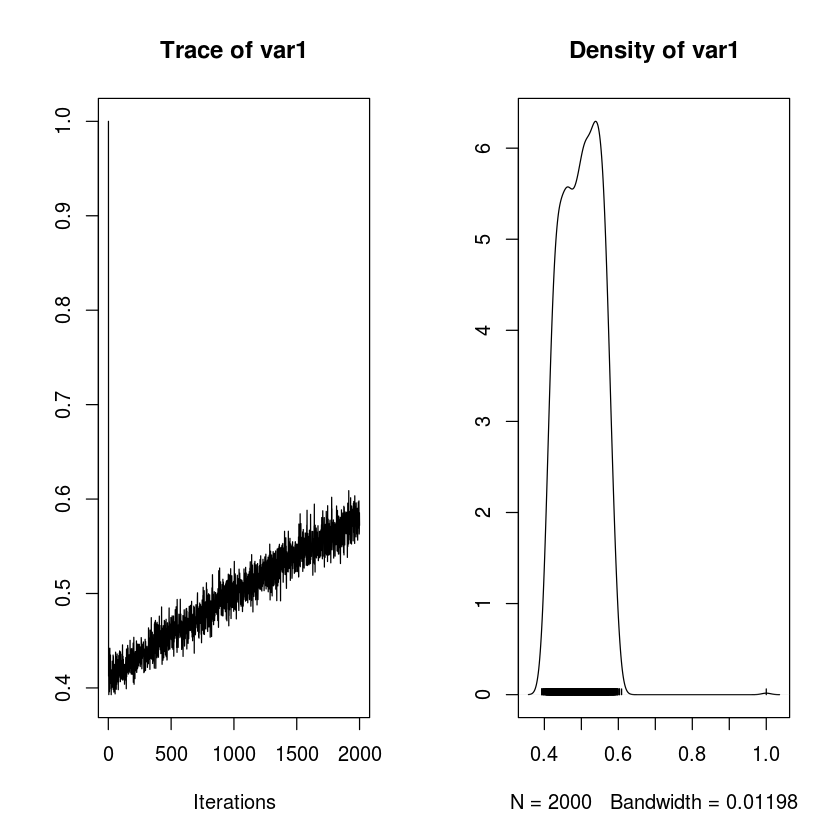

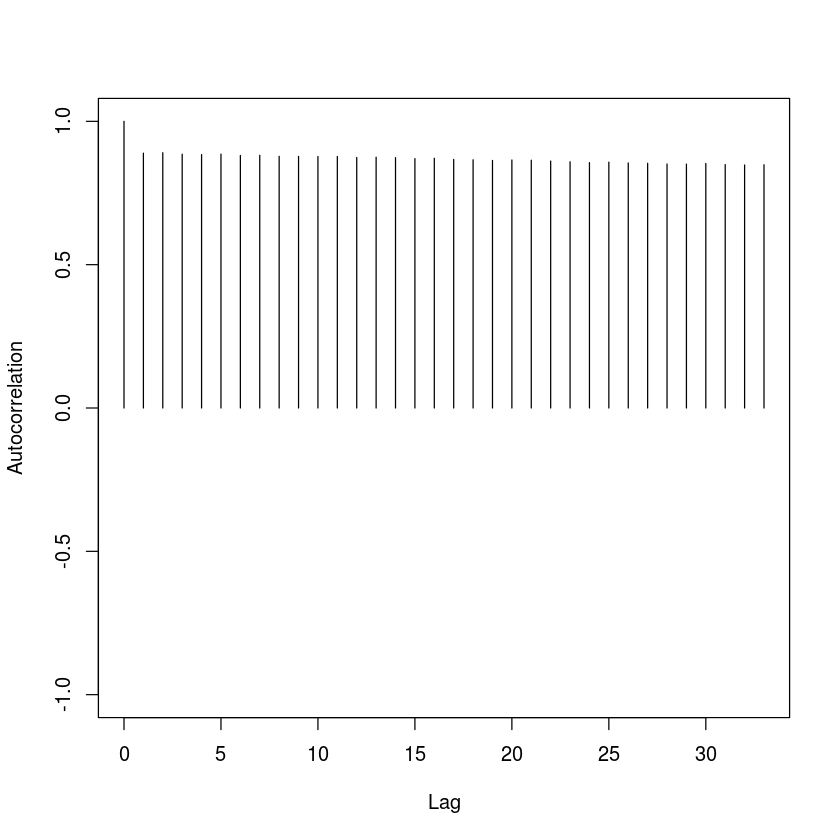

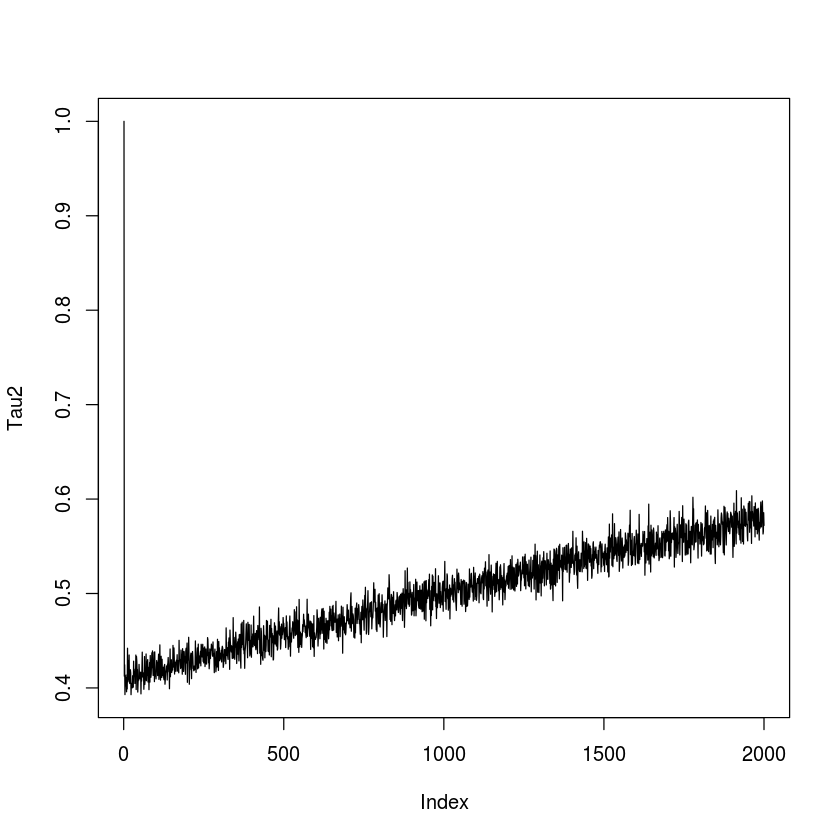

In [110]:
Tau2.mcmc = as.mcmc(Tau2) 
print(paste0("Estimate Mean of tau2:  ", mean(Tau2.mcmc)))
HPDinterval(Tau2.mcmc)
print(paste0("Effective Sample Size:  ", effectiveSize(Tau2.mcmc)))
plot(Tau2.mcmc)
autocorr.plot(Tau2.mcmc)
plot(Tau2, typ = 'l')


[1] "Estimate Mean of theta:  0.9355980383"


,lower,upper
var1,0.9309379,0.941801


[1] "Effective Sample Size:  2000"


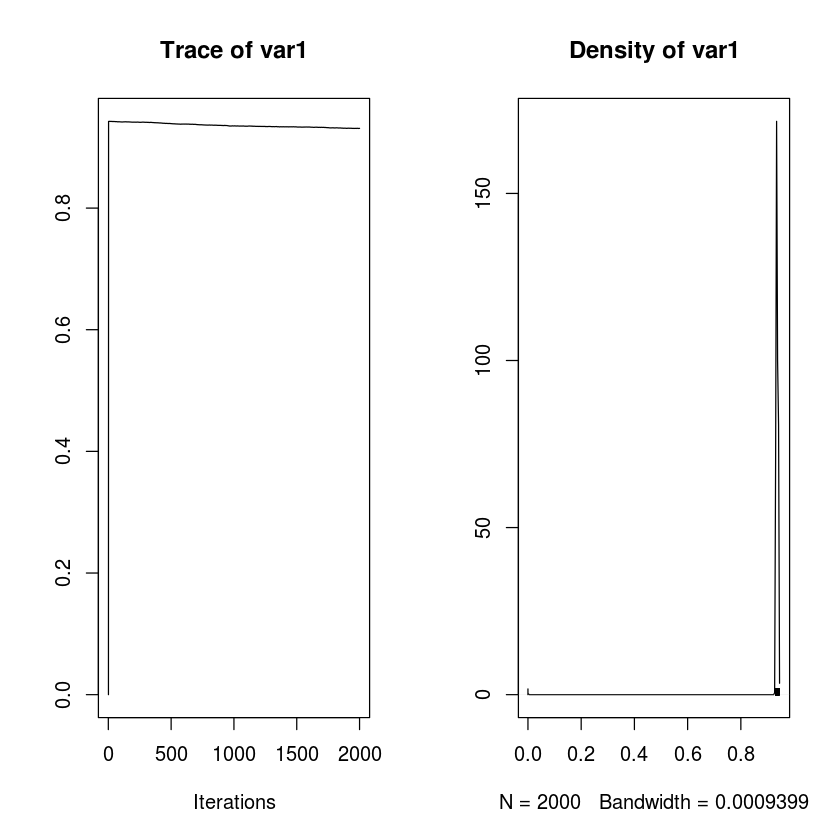

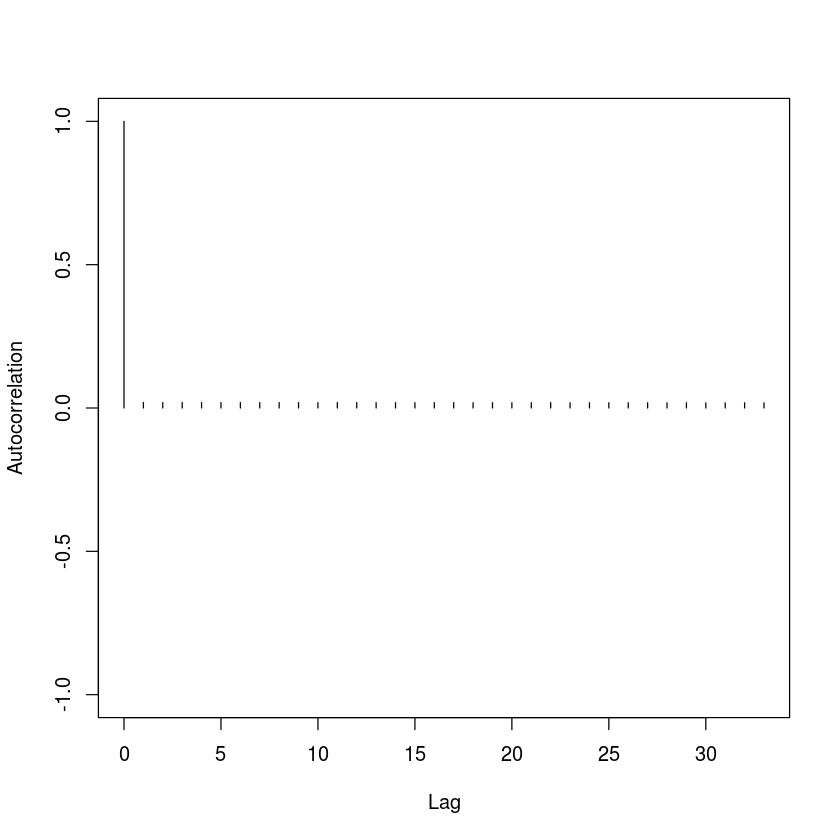

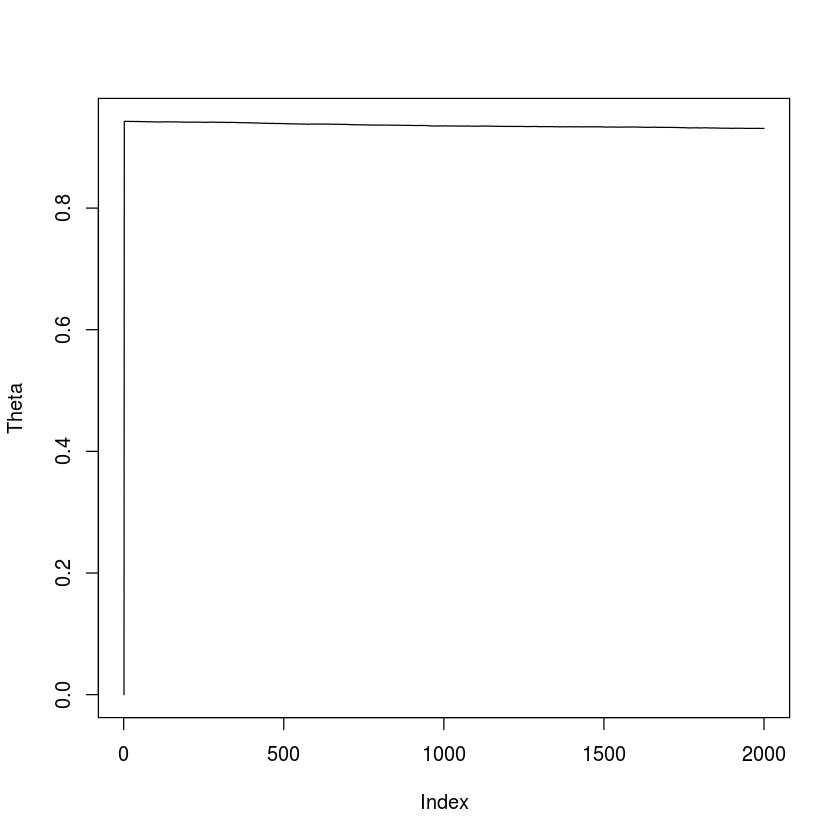

In [111]:
Theta.mcmc = as.mcmc(Theta) 
print(paste0("Estimate Mean of theta:  ", mean(Theta.mcmc)))
HPDinterval(Theta.mcmc)
print(paste0("Effective Sample Size:  ", effectiveSize(Theta.mcmc)))
plot(Theta.mcmc)
autocorr.plot(Theta.mcmc)
plot(Theta, typ = 'l')

[1] "Estimate Mean of rho:  0.87299598775"


,lower,upper
var1,0.8213758,0.9175688


[1] "Effective Sample Size:  6.36250321597427"


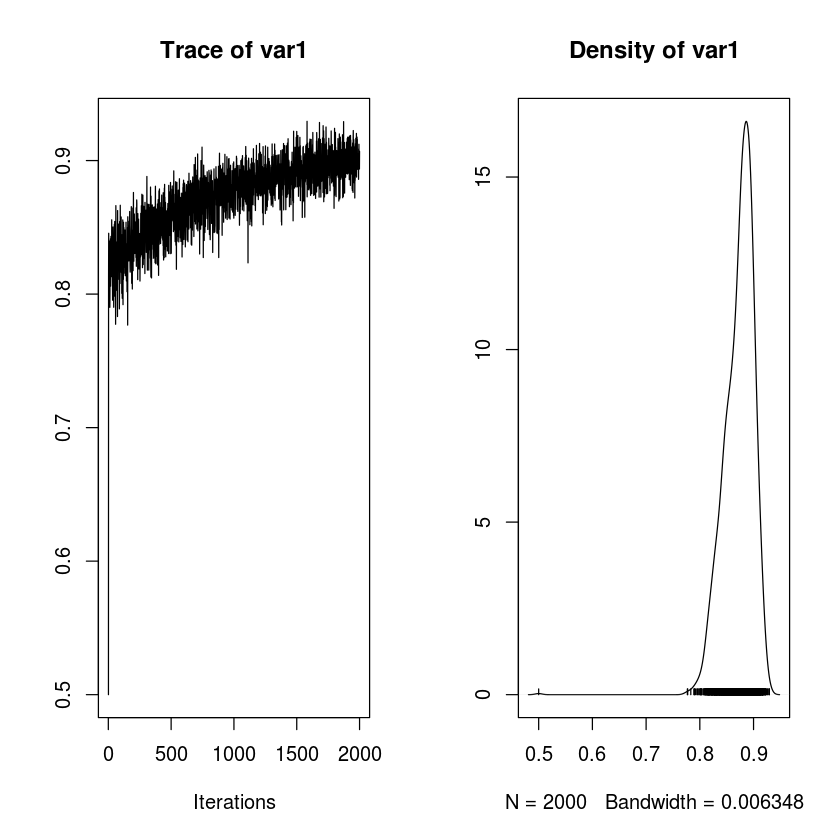

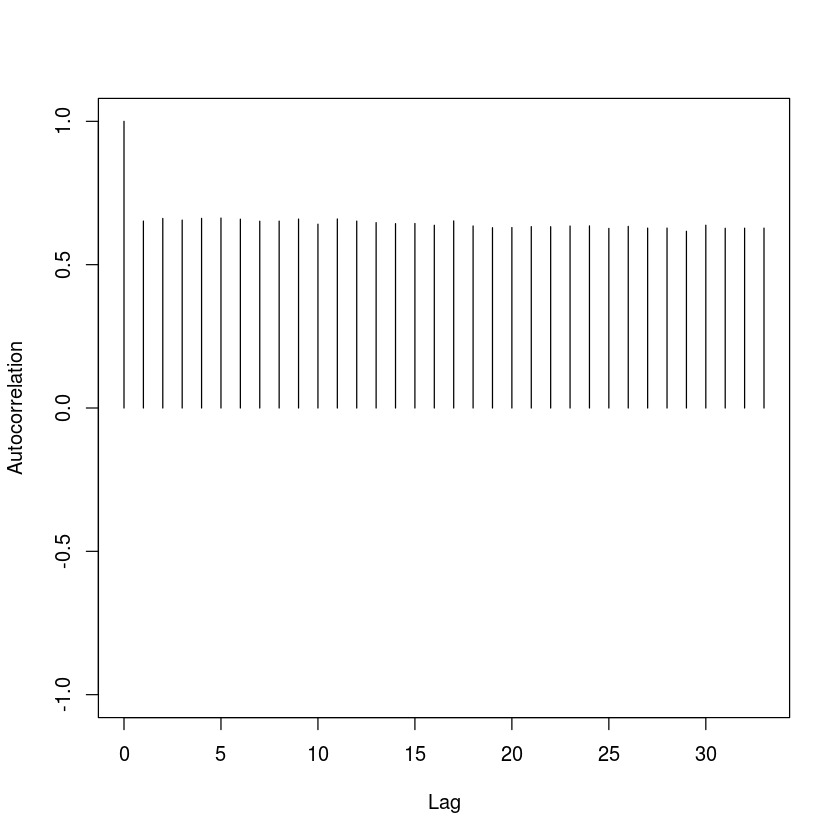

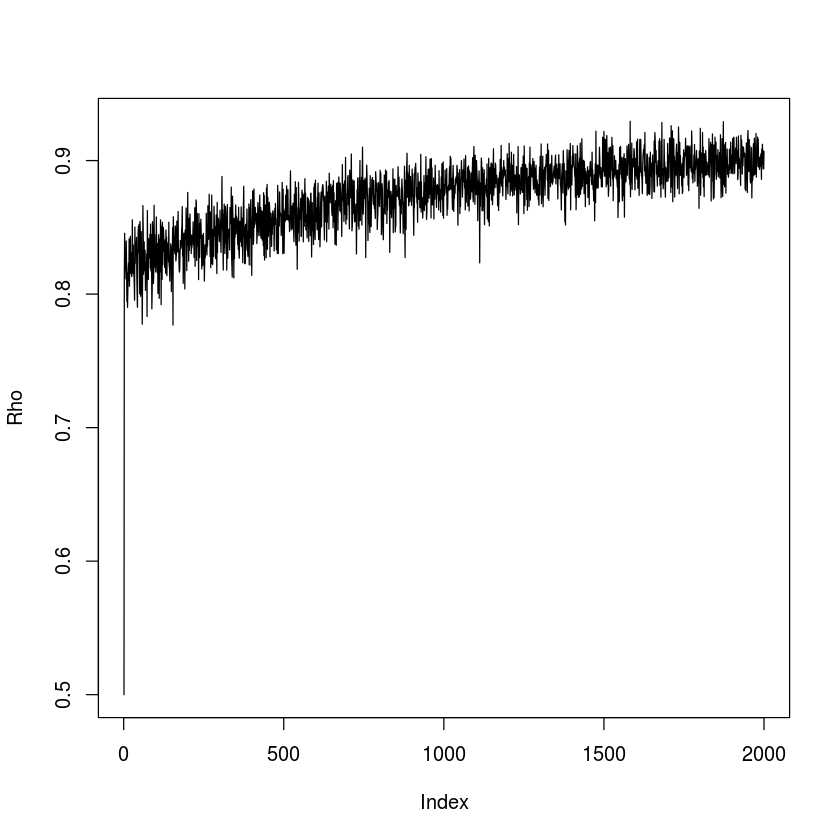

In [112]:

Rho.mcmc = as.mcmc(Rho) 
print(paste0("Estimate Mean of rho:  ", mean(Rho.mcmc)))
HPDinterval(Rho.mcmc)
print(paste0("Effective Sample Size:  ", effectiveSize(Rho.mcmc)))
plot(Rho.mcmc)
autocorr.plot(Rho.mcmc)
plot(Rho, typ = 'l')


In [113]:
# Here we predict the flu from Jan 2017 to Dec 2017

In [114]:
formatInfo<-read.csv("./formatInfoall.csv")
df <- read.fwf(file="./all.txt", widths=formatInfo$width + 1, skip=1, strip.white=TRUE, na.strings="n.a.") 
# V14 is the number of flu for state i and time t


formatInfoW<-read.csv("./formatInfoW.csv")
W<- read.fwf(file="./w.txt", widths=formatInfoW$width + 1, skip=1, strip.white=TRUE, na.strings="n.a.") 

######################## End Import Cleaned Data #########################
dim(df)
W = as.matrix(W)
d=rowSums(W[,1:47])
D=diag(d,47,47)

df$V5<-as.numeric(gsub(",", "", df$V5))

Y=df$V14
x0=1
x1=df$V4/100000000 # population in 100 million
x2=df$V5/1000 # income in 1000
x3=df$V6 # temperature
x4=df$V7 # precipation
x5=df$V8/df$V4 # share of white
x6=df$V9/df$V4 # share of African American
x7=df$V10/df$V4 # share of American Indian
x8=df$V11/df$V4 # share of Asian

df$spring = 0  # summer as a benchmark
df$autumn = 0
df$winter = 0

df$spring[which(df$V3==3 | df$V3==4 | df$V3==5)] = 1
df$autumn[which(df$V3==9 | df$V3==10 | df$V3==11)] = 1
df$winter[which(df$V3==12 | df$V3==1 | df$V3==2)] = 1

spring=df$spring
autumn=df$autumn
winter=df$winter

X=cbind(x0,x1,x2,x3,x4,x5,x6,x7,x8,spring,autumn,winter)

# here we only use the data from Oct,2010-Dec,2016 to train the data
# the data in 2017 will be used to forecast

#Y=Y[1:(4089-564)]  # 47*12=564
#X=X[1:(4089-564),]

Y=Y[(4089-564+1):4089]  # 47*12=564
X=X[(4089-564+1):4089,]
dim(X)
# popu: one hundred million
# income: thousand
# temperature: Degrees Fahrenheit,
# Temperature is in Fahrenheit and Precipitation is in Inches 

# First using MLE find the sd for proposal distribution of beta
fit <- glm(Y ~ X[,1:12]-1, family=poisson()) # X[,1] is the intercept
summary(fit) 


[1] 4089   14

[1] 564  12


Call:
glm(formula = Y ~ X[, 1:12] - 1, family = poisson())

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-94.47  -22.70  -11.97    4.25  240.11  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
X[, 1:12]x0     -1.314e+01  2.181e-01  -60.27   <2e-16 ***
X[, 1:12]x1      5.326e+00  2.178e-02  244.54   <2e-16 ***
X[, 1:12]x2     -2.818e-02  1.799e-04 -156.64   <2e-16 ***
X[, 1:12]x3     -2.718e-02  1.239e-04 -219.36   <2e-16 ***
X[, 1:12]x4     -5.371e-02  5.812e-04  -92.41   <2e-16 ***
X[, 1:12]x5      2.144e+01  2.197e-01   97.56   <2e-16 ***
X[, 1:12]x6      2.945e+01  2.151e-01  136.93   <2e-16 ***
X[, 1:12]x7      2.853e+01  2.580e-01  110.59   <2e-16 ***
X[, 1:12]x8      3.424e+01  2.718e-01  126.00   <2e-16 ***
X[, 1:12]spring  6.770e-01  4.914e-03  137.76   <2e-16 ***
X[, 1:12]autumn  4.039e-01  4.977e-03   81.16   <2e-16 ***
X[, 1:12]winter  7.158e-01  5.838e-03  122.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

In [115]:
# plug in the estimated parameter

beta = apply(Beta.mcmc, 2, mean)
tau2 =mean(Tau2.mcmc)
theta=mean(Theta.mcmc)
rho=mean(Rho.mcmc)

In [116]:
DW<-D-rho*W  
DWI<-solve(DW)
DW<-as.matrix(DW)
DWI<-as.matrix(DWI)

In [117]:
N=47
M=87
phi = matrix(-99, nrow = N, ncol = M) 
epsilon = matrix(-99, nrow = N, ncol = M) 
for (t in 1:M) {
    phi[,t] = t(rmvnorm(1, mean=rep(0,N), sigma=tau2*DWI)) 
  }
  epsilon[,1] = phi[,1]
  for (t in 2:M) {
    epsilon[,t] = theta*epsilon[,t-1] + phi[,t]
  }

In [118]:
epsilon=as.vector(epsilon[,76:87])

In [119]:
Y.pred=exp(X%*%beta+epsilon)

In [120]:
mean((Y-Y.pred)^2)

[1] 9199394

In [121]:
Y<-matrix(Y, nrow=47, ncol=12)

In [122]:
Y.pred<-matrix(Y.pred, nrow=47, ncol=12)

In [123]:
apply(Y, 2, mean)

[1] 2502.7447 2575.0851 3202.0638 1054.7660  746.5957  530.6596  500.4255
 [8]  480.8936  670.3617 1484.0638 1716.0000 3059.0213

In [124]:
apply(Y.pred, 2, mean)

[1]  969.0698 1010.5019 1402.9030 1031.9578  523.5186  232.2274  310.8714
 [8]  244.8342  284.9052  533.1554  641.3986  869.6049